In [5]:
#=========================================
#                Fractal Dream Attractor 
#=========================================
#                X = sin(b * Y) + c * sin(b * X)
#                Y = sin(a * X) + d * sin(a * Y)

In [6]:
import numpy as np
import pandas as pd
import panel as pn
import datashader as ds
from numba import jit
from datashader import transfer_functions as tf

In [9]:
@jit(nopython=True)
def FractalDream_trajectory(x0, y0, n, a, b, c, d):
    x, y = np.zeros(n), np.zeros(n)
    x[0], y[0] = x0, y0
    
    for i in np.arange(n-1):
        # Equation
        x[i+1] = np.sin(b*y[i]) + c*np.sin(b*x[i])
        y[i+1] = np.sin(a*x[i]) + d*np.sin(a*y[i])
    
    return x, y

In [10]:
def FractalDream_plot(n=600000, a=-1.1, b=-2.3, c=-1.9, d=2.2, cmap=["yellow", "green"]):
    # Initial value of X and Y
    x0, y0 =0.1, 0.1
    cvs = ds.Canvas(plot_width=700, plot_height=700)
    
    x, y = FractalDream_trajectory(x0, y0, n, a, b, c, d)
    agg = cvs.points(pd.DataFrame({'x':x, 'y':y}), 'x', 'y')
    
    return tf.shade(agg, cmap)

Column
    [0] Column
        [0] IntSlider(end=1000000, name='n', start=1, value=600000)
        [1] FloatSlider(end=1.1, name='a', start=-3.3000000000000003, value=-1.1)
        [2] FloatSlider(end=2.3, name='b', start=-6.8999999999999995, value=-2.3)
        [3] FloatSlider(end=1.9, name='c', start=-5.699999999999999, value=-1.9)
        [4] FloatSlider(end=6.6000000000000005, name='d', start=-2.2, value=2.2)
    [1] Row
        [0] PNG(Image, name='interactive00028')
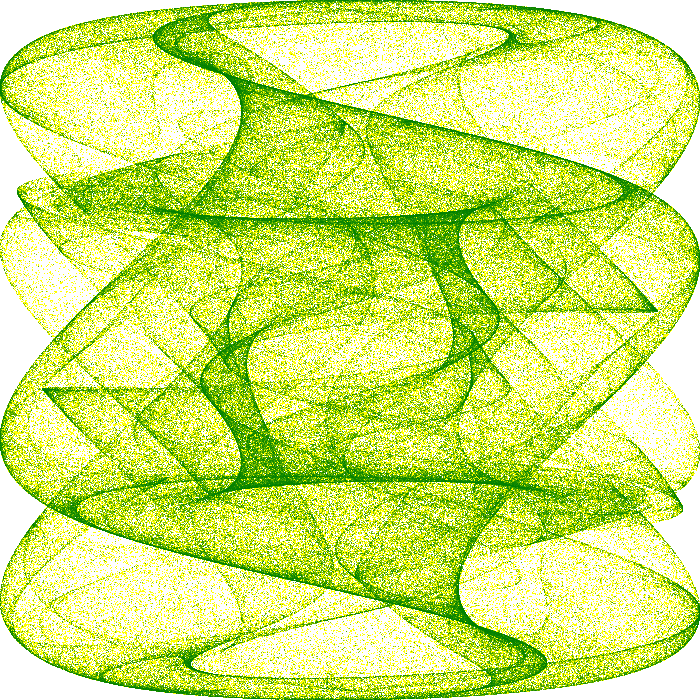

In [11]:
pn.extension()
pn.interact(FractalDream_plot, n=(1,1000000))